# Analysis of Public Art in Vancouver

## Introduction

Vancouver is a city with rich cultural histories and diversities, and there is no better way than Public Art appreciation to explore those cultures and this city. We found a data set on Vancouver's Public Art statistics. By analyzing this data set, we'd like to take a deeper look into the Public Art in Vancouver. Based on the analysis, we would like to predict the possible future development of the city's art and cultural infrustructure.

#### Data Source: [City of Vancouver](http://data.vancouver.ca/datacatalogue/publicArt.htm) 

### Table of Content

1. Introducing the data
2. Clean the data frame
3. Analysis by topics
    * Year
        * Trend
        * Prediction
    * Artists
    * Location
    * Neighbourhood
    * Status
    * Ownership
4. Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('public_art.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 13: invalid start byte

There is an encoding error. This dataset comes from the [City of Vancouver](http://data.vancouver.ca/datacatalogue/publicArt.htm) and there are probably some French accent characters that pandas doesn't recognize. Let's try again and specify `encoding='latin'` to pandas that there are accent chatacters in the data.

In [3]:
data = pd.read_csv('public_art.csv',encoding='latin')

#### Let's check out our data set.

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 19 columns):
RegistryID                666 non-null int64
TitleOfWork               666 non-null object
YearOfInstallation        646 non-null float64
Status                    666 non-null object
DescriptionOfwork         514 non-null object
ArtistProjectStatement    350 non-null object
SiteName                  617 non-null object
SiteAddress               574 non-null object
Neighbourhood             555 non-null object
Latitude                  519 non-null float64
Longitude                 519 non-null float64
LocationOnsite            516 non-null object
Type                      658 non-null object
PrimaryMaterial           499 non-null object
Ownership                 558 non-null object
URL                       666 non-null object
PhotoURL                  582 non-null object
PhotoCredits              300 non-null object
Artists                   662 non-null object
dtypes: float64(3),

We have 666 rows of data and 19 columns. Let's use the function `.head()` to see the first 5 rows of the data.

In [190]:
data.head()

,RegistryID,TitleOfWork,YearOfInstallation,Status,DescriptionOfwork,ArtistProjectStatement,SiteName,SiteAddress,Neighbourhood,Latitude,Longitude,LocationOnsite,Type,PrimaryMaterial,Ownership,URL,PhotoURL,PhotoCredits,Artists
0,1,Captain George Vancouver,1936.0,In place,A full figure bronze statue of Captain George ...,A new city hall and a statue of Captain George...,Vancouver City Hall,453 West 12th Avenue,Mount Pleasant,49.261185,-123.113918,"North entrance, exterior, in front of stairs",Figure,bronze,City of Vancouver,https://covapp.vancouver.ca/PublicArtRegistry/...,https://covapp.vancouver.ca/PublicArtRegistry/...,Barbara Cole,98
1,2,The Swimmer,1977.0,In place,An abstract form representing the motion of sw...,"Commissioned by Duncan McNab and Associates, a...",Vancouver Aquatic Centre,1050 Beach Avenue,West End,49.276990,-123.135029,Front entrance facing north,Sculpture,Silicon bronze,City of Vancouver,https://covapp.vancouver.ca/PublicArtRegistry/...,https://covapp.vancouver.ca/PublicArtRegistry/...,Barbara Cole,264
2,3,George Cunningham Memorial Sundial,1967.0,In place,"A classic bronze sundial sits on top of a 4'5""...",Erected under the auspices of the Centennial C...,English Bay,Beach Avenue & Denman Street,West End,49.287577,-123.141787,In centre of public seating area,Sculpture,"bronze, stone, granite",City of Vancouver,https://covapp.vancouver.ca/PublicArtRegistry/...,https://covapp.vancouver.ca/PublicArtRegistry/...,NaN,41
3,4,Two Steel and Copper Fountains,1965.0,In place,Two copper ship-like abstract forms grace a po...,NaN,Beach Towers Apartments,1600 Beach Avenue,West End,49.284080,-123.142216,On west and east sides of the east tower,Fountain,"Steel & copper, mosaic tile",private,https://covapp.vancouver.ca/PublicArtRegistry/...,https://covapp.vancouver.ca/PublicArtRegistry/...,NaN,145
4,5,Untitled (Clydemont Centre),1949.0,In place,An elegant figurative relief in nouveau modern...,NaN,Clydemont Centre,307 West Broadway,Mount Pleasant,49.263263,-123.111389,Front Façade,Relief,Stone,private,https://covapp.vancouver.ca/PublicArtRegistry/...,https://covapp.vancouver.ca/PublicArtRegistry/...,NaN,93


From this Public Art data, we want to investigate the distrubution of Public Art project's type, status, and ownership related to location(neighbourhood) and time series(year of installation).

We have contructed a new data frame by dropping the below irrelevant columns:
**Registry ID, DescriptionOfwork, ArtistProjectStatement, SiteName, SiteAddress, LocationOnsite, PrimaryMaterial, URL, PhotoURL, PhotoCredits**

In [191]:
data.drop(data.columns[[0,4,5,6,7,11,13,15,16,17]], axis=1, inplace=True)

In [192]:
public_art = data

Let's take a look at the new data set `public_art`. The first few rows of `public_art` are shown below.

In [9]:
public_art.head()

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
0,Captain George Vancouver,1936.0,In place,Mount Pleasant,49.261185,-123.113918,Figure,City of Vancouver,98
1,The Swimmer,1977.0,In place,West End,49.276990,-123.135029,Sculpture,City of Vancouver,264
2,George Cunningham Memorial Sundial,1967.0,In place,West End,49.287577,-123.141787,Sculpture,City of Vancouver,41
3,Two Steel and Copper Fountains,1965.0,In place,West End,49.284080,-123.142216,Fountain,private,145
4,Untitled (Clydemont Centre),1949.0,In place,Mount Pleasant,49.263263,-123.111389,Relief,private,93


#### Let's check our new data set

In [10]:
public_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 9 columns):
TitleOfWork           666 non-null object
YearOfInstallation    646 non-null float64
Status                666 non-null object
Neighbourhood         555 non-null object
Latitude              519 non-null float64
Longitude             519 non-null float64
Type                  658 non-null object
Ownership             558 non-null object
Artists               662 non-null object
dtypes: float64(3), object(6)
memory usage: 46.9+ KB


From the above data information summary, we know that `public_art` contains 666 rows and 9 columns, while some columns have less than 666 entries. This may be due to missing data. Let's see what the columns (variables) are.

### Variable Explanation
* **TitleOfWork**: Artwork title provided by artist
* **YearOfInstallation**: Year the artwork was originally installed
* **Status**: Current status of the artwork, as follows:
    * In place - Artwork exists at the location specified and is available for viewing
    * Removed - Artwork has been removed and is not available for viewing
* **Neighbourhood**: In 1969, City Council approved twenty-two local areas as a basis for the organization of community services and city departments
* **Latitude**: Latitude of specified public artwork 
* **Longitude**: Longitude of specified public artwork
* **Type**: Category of artwork
* **Ownership**: Acknowledgement of the entity primarily responsible for the artwork
* **Artists**: Unique identifier of the artists associated with the artwork

#### All set, let's start our analysis

## 1. Year Of Installation

Let's look the `YearOfInstallation` to have a visual of the number of public art projects each year by a bar graph. A copy of data `pa_year` is created by keeping those art projects with valid `YearOfInstallation` (dropping `NaN`).

In [193]:
pa_year = public_art[~public_art['YearOfInstallation'].isnull()].copy()

In [194]:
def int_year(a_float):
    return int(a_float)

In [195]:
pa_year['YearOfInstallation'] = pa_year['YearOfInstallation'].apply(int_year)

Entries in `YearOfInstallation` are initially floats, we converted them into integers. Let's take a look at the `pa_year`.

In [196]:
pa_year.head()

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
0,Captain George Vancouver,1936,In place,Mount Pleasant,49.261185,-123.113918,Figure,City of Vancouver,98
1,The Swimmer,1977,In place,West End,49.276990,-123.135029,Sculpture,City of Vancouver,264
2,George Cunningham Memorial Sundial,1967,In place,West End,49.287577,-123.141787,Sculpture,City of Vancouver,41
3,Two Steel and Copper Fountains,1965,In place,West End,49.284080,-123.142216,Fountain,private,145
4,Untitled (Clydemont Centre),1949,In place,Mount Pleasant,49.263263,-123.111389,Relief,private,93


#### Are you curious about the earliest and latest art work? Let's check them out!

In [197]:
pa_year['YearOfInstallation'].max()

2017

In [198]:
pa_year['YearOfInstallation'].min()

1905

In [18]:
public_art[public_art['YearOfInstallation']== 2017]

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
650,Listening. On. Waking Terrain.,2017.0,In place,Downtown,49.272627,-123.099000,Mural,NaN,419
651,All My Favorite People Are Animals,2017.0,In place,Strathcona,NaN,NaN,Site Work,City of Vancouver,411
652,Pattern Reflection,2017.0,In place,Fairview,NaN,NaN,Site Work,Privately Owned,382
653,Sea to Sky,2017.0,In place,Downtown,49.279931,-123.112000,Mural,City of Vancouver,324
654,Heartbeat,2017.0,In place,Downtown,NaN,NaN,Mural,City of Vancouver,565
655,Time Immemorial,2017.0,In place,Downtown,NaN,NaN,Banners,City of Vancouver,566
656,Spirits of the Realms,2017.0,In place,Downtown,49.280060,-123.110500,Mural,City of Vancouver,294;567;568;569;570;571
657,Bringing Light to Darkness,2017.0,In place,DowntownEastside,NaN,NaN,Mural,NaN,572;573
658,Nekú Netsí Kezhi (our home and native land),2017.0,In place,Downtown,49.281865,-123.119083,Mural,City of Vancouver,582
659,Pick-up Sticks,2017.0,In place,Kitsilano,49.262801,-123.150744,Site Work,Privately Owned,585


In [19]:
public_art[public_art['YearOfInstallation']== 1905]

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
77,Queen Victoria Memorial Drinking Fountain,1905.0,In place,Stanley Park,49.297138,-123.134314,Fountain,City of Vancouver,16


### Trend

As shown above, we have found the earliest installation recorded is in 1905, and the latest is in 2017. What would the trend of the number of Pubic Art installed look like shown by a line graph during that time period?

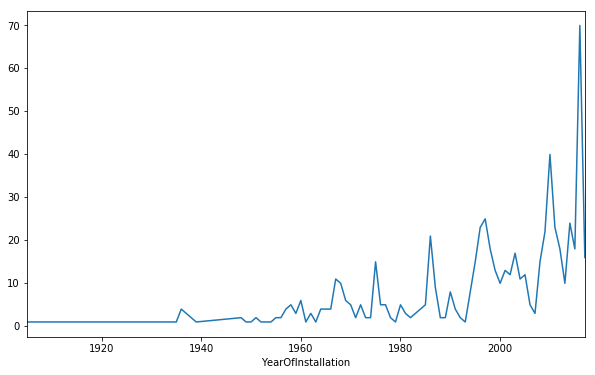

In [202]:
pa_year.groupby('YearOfInstallation')['YearOfInstallation'].size().plot(kind='line',figsize=(10,6))

In [208]:
pa_year.groupby('YearOfInstallation').size().sort_values(ascending=False)

YearOfInstallation
2016    70
2010    40
1997    25
2014    24
2011    23
1996    23
2009    22
1986    21
2015    18
2012    18
1998    18
2003    17
2017    16
1975    15
2008    15
1995    15
2001    13
1999    13
2002    12
2005    12
2004    11
1967    11
2013    10
1968    10
2000    10
1987     9
1994     8
1990     8
1969     6
1960     6
        ..
1971     2
1973     2
1978     2
1982     2
1988     2
1992     2
1989     2
1963     1
1920     1
1924     1
1922     1
1921     1
1911     1
1912     1
1927     1
1910     1
1906     1
1925     1
1939     1
1928     1
1935     1
1993     1
1961     1
1949     1
1950     1
1952     1
1953     1
1954     1
1979     1
1905     1
dtype: int64

As shown in this line graph, there is an increasing trend of the number of art projects in general with several flunctuations, with an exceptionally high number of 70 installations in the year of 2016. 

### Prediction

From the above trend as a visual, we would like to predict the number of Public Art installed in the future with the following regression line.

In [183]:
x = pa_year['YearOfInstallation'].sort_values(ascending=True).unique()
y = pa_year.groupby('YearOfInstallation').size()

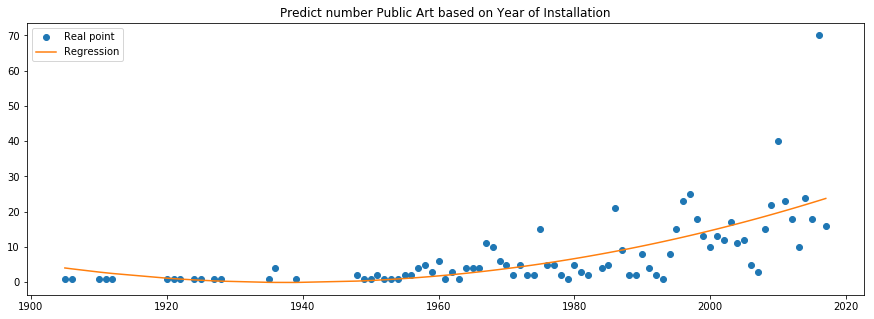

In [184]:
plt.figure(figsize=(15,5))
pf= np.polyfit(x,y,2)

rl, = plt.plot(x,y,'o',label='Real Data')
rg, = plt.plot(x,np.polyval(pf,x),label='Regression')
plt.title('Predict number Public Art based on Year of Installation')
plt.legend([rl,rg],['Real point','Regression'])
plt.show()

In [203]:
np.polyval(pf,2020)

25.582251213096242

For example, based on our regression line, we predict that the number of Public Art installation would be around 26 in 2020.

## 2. Artist

#### Let's check out how many Pubic Art installaments does each artist contribute?

In [209]:
public_art.groupby('Artists').size().sort_values(ascending=False)

Artists
195            17
264            11
241            10
131            10
41              9
515             7
148             7
3               7
140             6
98              6
145             5
83              5
251             5
47              4
136             4
300             4
122             4
284             4
277             4
391             4
69;260          3
258             3
19              3
236             3
253             3
45              3
123             3
202;259         3
528             3
396             3
               ..
48              1
480             1
481             1
433             1
432;488         1
430             1
413             1
400;401         1
402             1
403             1
404;405         1
406             1
407             1
408             1
410             1
411             1
412             1
415             1
429             1
416             1
418;509;545     1
42              1
420             1
422             1
42

Artist with ID 195 contribute the most public art projects, a total of 17. Let's see what are those 17 art projects and their type.

In [22]:
artist195 = public_art[public_art['Artists'] == '195']

In [23]:
artist195

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
6,Sidewalk Mosaic,1965.0,In place,Downtown,49.287305,-123.117000,Mosaic,City of Vancouver,195
21,Untitled (Cenotaph),1959.0,In place,Grandview-Woodland,49.273520,-123.069796,Memorial,City of Vancouver,195
29,Cross of Sacrifice,NaN,In place,Riley Park,49.234639,-123.096898,Memorial,City of Vancouver,195
91,Chehalis Cross,1906.0,In place,Stanley Park,49.299862,-123.118001,Memorial,City of Vancouver,195
93,Empress of Japan,1960.0,In place,Stanley Park,49.299969,-123.117887,Artefact,City of Vancouver,195
94,Lumberman's Arch,1952.0,In place,Stanley Park,49.302550,-123.130411,Sculpture,City of Vancouver,195
104,Discus Thrower,1969.0,In place,Kitsilano,49.276484,-123.143789,Sculpture,City of Vancouver,195
152,Christopher Columbus,1986.0,In place,Hastings-Sunrise,49.284136,-123.042774,Sculpture,City of Vancouver,195
166,Untitled (Shanghai lions),1995.0,In place,Downtown,49.284804,-123.099243,Sculpture,Government of Canada,195
216,Ring Gear,1987.0,In place,Downtown,49.274310,-123.116987,Artefact,City of Vancouver,195


#### Where are those public art located at?

In [24]:
artist195.groupby('Neighbourhood').size()

Neighbourhood
Downtown              5
DowntownEastside      2
Fairview              1
Grandview-Woodland    1
Hastings-Sunrise      1
Kitsilano             1
Riley Park            1
Stanley Park          4
West End              1
dtype: int64

From the above data, we conclude that Artist 195 has most of the Public Art projects placed in Downtown Area and Stanley Park.

## 3. Location

### What's the distribution of Public Art Installation by status and location?

We would like visualize public art projects' status by color using a scatter plot. This groups different status together:
* 1= In place
* 2= Removed

`Latitude` is used as the x-axis and `Longtitude` is used as the y-axis. We create new data copy of `pa_map` by deleting rows with `NaN` in either `Longitude` or `Latitude`. 

In [26]:
pa_map = public_art[~((public_art['Latitude'].isnull()) & (public_art['Longitude'].isnull()))].copy()

In [211]:
def code_status(a_string):
    if a_string == 'In place':
        return 1
    else:
        return 0

In [212]:
pa_map['status'] = pa_map['Status'].apply(code_status)

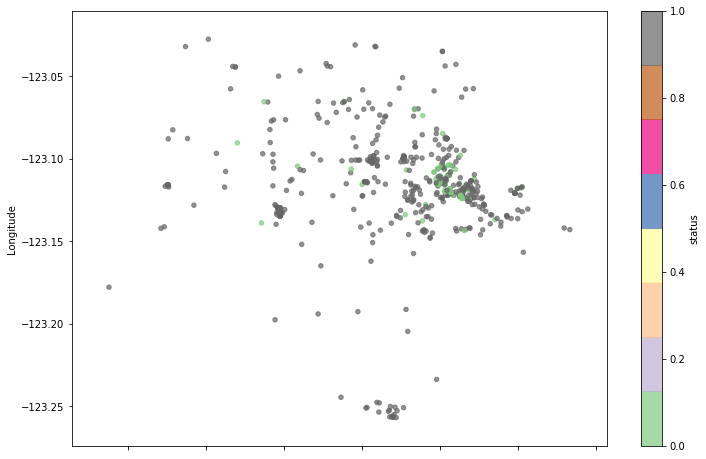

In [235]:
pa_map.plot(kind='scatter',x='Latitude',y='Longitude',c='status',cmap='Accent',figsize=(12,8),s=20,alpha=0.7)

We intend the visualize the Vancouver Public Art location distribution to be the shape of the city's map, while it turns out there are not enough data points to construct the map. We would like the observe the distribution of Public Art `in place` and `removed`. Green dots represent those `removed`, and grey dots represent those `in place`. There is a particular area with dots densely distributed, while we cannot directly tell its detailed location. Let's figure this out using Statistics in the Neighbourhood section.

## 3. Neighbourhood

### What is the distribution of public art by neighbourhood?

We suspect that Downtown has the most number of public art projects. Let's check by the pie chart.

(As the `Neighbourhood` column contained many `NaN` entries, we've deleted those invalid data and constructed a new sub data copy `pa_nh`.)

In [31]:
pa_nh = public_art[~public_art['Neighbourhood'].isnull()].copy()

Let's take a look at the new neighourhood data frame.

In [32]:
pa_nh.head()

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
0,Captain George Vancouver,1936.0,In place,Mount Pleasant,49.261185,-123.113918,Figure,City of Vancouver,98
1,The Swimmer,1977.0,In place,West End,49.276990,-123.135029,Sculpture,City of Vancouver,264
2,George Cunningham Memorial Sundial,1967.0,In place,West End,49.287577,-123.141787,Sculpture,City of Vancouver,41
3,Two Steel and Copper Fountains,1965.0,In place,West End,49.284080,-123.142216,Fountain,private,145
4,Untitled (Clydemont Centre),1949.0,In place,Mount Pleasant,49.263263,-123.111389,Relief,private,93


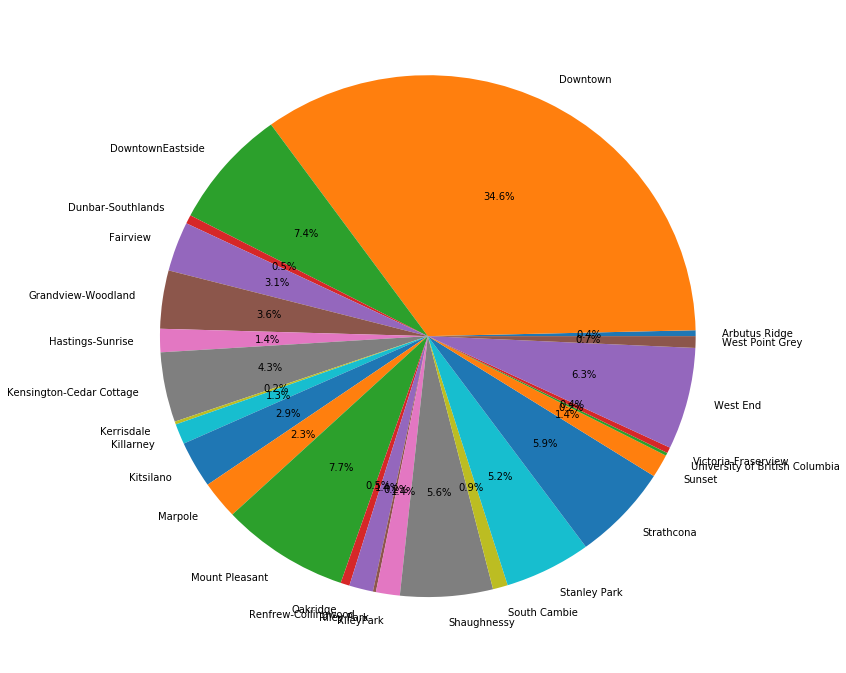

In [239]:
pa_nh.groupby('Neighbourhood').size().plot.pie(autopct='%.1f%%',figsize=(12,12))
plt.ylabel('');

From the above pie chart, we observe that Downtown area has the most number of Public Art installed (including West End, Stanley Park, Downtown Eastside), which corresponds to the dot density in the above map.

## 4. Status

There are two type of `Status` of Public Art, `Removed` or `In Place`. What is the proportion of each?

In [29]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))

Using the above function, we get the proportion percentage shown explicitly on the pie chart.

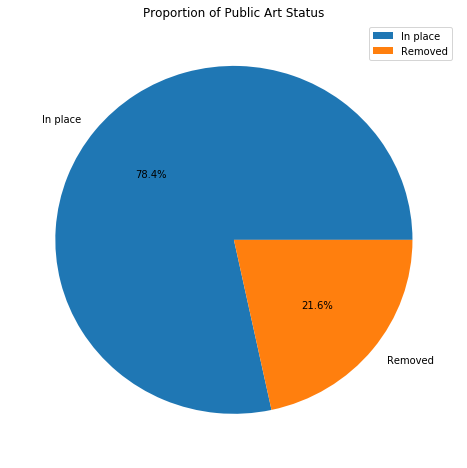

In [241]:
public_art.groupby('Status')['Status'].size().plot.pie(autopct='%.1f%%',figsize=(8,8),legend=True)
plt.title('Proportion of Public Art Status')
plt.ylabel('');
plt.show()

From the above the Pie chart, we've found that 78.4% of the public art installations are in placed, while 21.6% of them are removed. Those art works are mostly well maintained.

## 5. Ownership

#### How does the number of Public Art Installations vary by ownership type?

(As the `Ownership` column contained many `NaN` entries, we've deleted those invalid data and constructed a new sub data copy `pa_op`.)

In [245]:
pa_op = pa_year[~pa_year['Ownership'].isnull()].copy()

In [246]:
pa_op

,TitleOfWork,YearOfInstallation,Status,Neighbourhood,Latitude,Longitude,Type,Ownership,Artists
0,Captain George Vancouver,1936,In place,Mount Pleasant,49.261185,-123.113918,Figure,City of Vancouver,98
1,The Swimmer,1977,In place,West End,49.276990,-123.135029,Sculpture,City of Vancouver,264
2,George Cunningham Memorial Sundial,1967,In place,West End,49.287577,-123.141787,Sculpture,City of Vancouver,41
3,Two Steel and Copper Fountains,1965,In place,West End,49.284080,-123.142216,Fountain,private,145
4,Untitled (Clydemont Centre),1949,In place,Mount Pleasant,49.263263,-123.111389,Relief,private,93
5,Untitled,1968,In place,Downtown,49.287929,-123.124400,Sculpture,private,117
6,Sidewalk Mosaic,1965,In place,Downtown,49.287305,-123.117000,Mosaic,City of Vancouver,195
7,Charles Bentall,1977,In place,Downtown,49.286828,-123.117800,Bust,private,241
8,Ksan Mural,1972,In place,Downtown,49.284867,-123.121201,Relief,private,109;138;223;224;232
9,Untitled,1954,In place,Downtown,49.286289,-123.118500,Mural,private,145


Since there are too many `Ownership` criteria, we've narrowed them down into three main categories: `Private`, `Non-private`, and `Other` using the function below.

In [247]:
def group_op(a_string):
    if a_string == 'private':
        return 'Private'
    if a_string == 'Privately Owned':
        return 'Private'
    elif a_string == 'Other':
        return 'Other'
    else:
        return 'Non-private'

We've also group the `YearOfInstallation` into 20-year periods.

In [248]:
def group_year(a_year):
    if a_year <=1920:
        return 1920
    if a_year <=1940:
        return 1940
    if a_year <=1960:
        return 1960
    if a_year <=1980:
        return 1980
    if a_year <=2000:
        return 2000
    if a_year <=2020:
        return 2020
    

In [249]:
pa_op['ownership'] = pa_op['Ownership'].apply(group_op)

In [250]:
pa_op['year'] = pa_op['YearOfInstallation'].apply(group_year)

Two new columns have been created, let's check the data frame below.

In [251]:
pa_op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 664
Data columns (total 11 columns):
TitleOfWork           542 non-null object
YearOfInstallation    542 non-null int64
Status                542 non-null object
Neighbourhood         438 non-null object
Latitude              415 non-null float64
Longitude             415 non-null float64
Type                  535 non-null object
Ownership             542 non-null object
Artists               538 non-null object
ownership             542 non-null object
year                  542 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 50.8+ KB


In [252]:
ownership = pa_op.groupby(['year','ownership'])['ownership'].size().unstack()

In [253]:
ownership

ownership,Non-private,Other,Private
year,,,
1920,6.0,NaN,NaN
1940,12.0,NaN,NaN
1960,21.0,NaN,8.0
1980,54.0,NaN,39.0
2000,134.0,1.0,25.0
2020,201.0,3.0,38.0


This shows a count of Ownership by year to be used in the following bar graph.

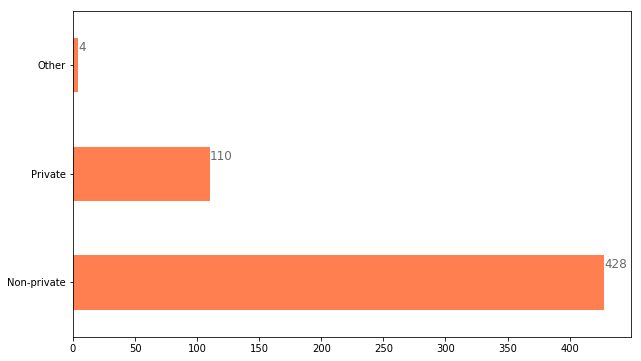

In [254]:
ownership_bar = pa_op['ownership'].value_counts().plot(kind='barh', figsize=(10,6),color="coral", fontsize=10)
totals = []
for i in ownership_bar.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ownership_bar.patches:
    ownership_bar.text(i.get_width()+.3, i.get_y()+.38,str((i.get_width())), fontsize=12,color='dimgrey')

The above bar graph shows a count of each type of the three ownerships. Most Public Art installations are non-private with a number of 428.

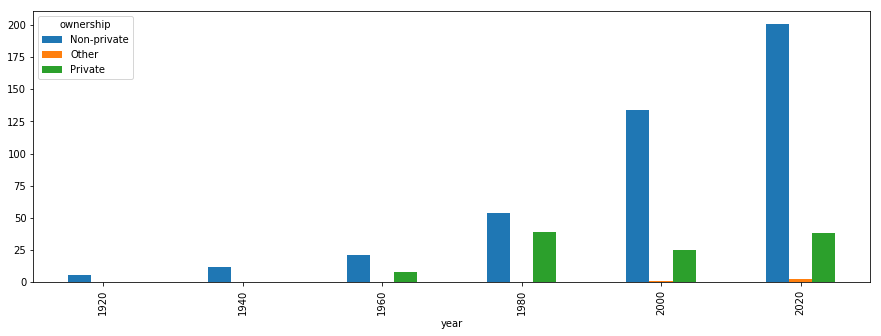

In [44]:
ownership.plot.bar(figsize=(15,5))

Shown by the above bar graph, we see that the number of Non-privately owned Public Art installaments has a steady increasing trend over years, while the number Private Public Art installments does not have an obvious trend. We suspect that since Non-private Public Art has annual subsidy and support from the government, so it has such increasing trend.

## Summary

The number of Public Art Installments is increasing by year from 1905 to 2017. There is a profound artistic atmosphere in the Downtown area since it has the largest number of Public Art installments. The majority of those installments is owned non-privately. As only few number of installments are in `removed` status, most of those art works are well maintained. We expect to see a bigger number of Public Art works in the future for a beautifully constructed Vancouver.